In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anasmohammedtahir/covidqu")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'covidqu' dataset.
Path to dataset files: /kaggle/input/covidqu


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
print(os.listdir(path))

['COVID-QU-Ex dataset.txt', 'Infection Segmentation Data', 'Lung Segmentation Data']


In [ ]:
for root,dir,files in os.walk(path):
  print(root,"->",len(files))

/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7 -> 1
/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data -> 0
/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data -> 0
/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data/Val -> 0
/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data/Val/Non-COVID -> 0
/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data/Val/Non-COVID/infection masks -> 233
/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infection Segmentation Data/Val/Non-COVID/images -> 233
/root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Infection Segmentation Data/Infe

In [ ]:
import os

print("Infection Segmentation:")
base = os.path.join(path, "Infection Segmentation Data", "Infection Segmentation Data")

splits = ["Train", "Val", "Test"]
classes = ["COVID-19", "Normal", "Non-COVID"]

infection_total = 0
for split in splits:
    print(f"\n{split} split:")
    split_total = 0
    for cls in classes:
        img_dir = os.path.join(base, split, cls, "images")
        lung_dir = os.path.join(base, split, cls, "lung masks")
        inf_dir  = os.path.join(base, split, cls, "infection masks")

        img_count = len(os.listdir(img_dir))
        lung_count = len(os.listdir(lung_dir))
        inf_count = len(os.listdir(inf_dir))

        print(f"  {cls}: {img_count} images, {lung_count} lung masks, {inf_count} infection masks")


        if not (img_count == lung_count == inf_count):
            print(f" Warning: mismatch in counts for {cls} {split}")

        split_total += img_count
    print(f"  {split} Total: {split_total}")
    infection_total += split_total

print(f"\nInfection Total: {infection_total}")


print("\nLung Segmentation:")
base = os.path.join(path, "Lung Segmentation Data", "Lung Segmentation Data")

lung_total = 0
for split in splits:
    print(f"\n{split} split:")
    split_total = 0
    for cls in classes:
        img_dir = os.path.join(base, split, cls, "images")
        mask_dir = os.path.join(base, split, cls, "lung masks")

        img_count = len(os.listdir(img_dir))
        mask_count = len(os.listdir(mask_dir))

        print(f"  {cls}: {img_count} images, {mask_count} lung masks")

        if img_count != mask_count:
            print(f"Warning: mismatch in counts for {cls} {split}")

        split_total += img_count
    print(f"  {split} Total: {split_total}")
    lung_total += split_total

print(f"\nLung Total: {lung_total}")


Infection Segmentation:

Train split:
  COVID-19: 1864 images, 1864 lung masks, 1864 infection masks
  Normal: 932 images, 932 lung masks, 932 infection masks
  Non-COVID: 932 images, 932 lung masks, 932 infection masks
  Train Total: 3728

Val split:
  COVID-19: 466 images, 466 lung masks, 466 infection masks
  Normal: 233 images, 233 lung masks, 233 infection masks
  Non-COVID: 233 images, 233 lung masks, 233 infection masks
  Val Total: 932

Test split:
  COVID-19: 583 images, 583 lung masks, 583 infection masks
  Normal: 291 images, 291 lung masks, 291 infection masks
  Non-COVID: 292 images, 292 lung masks, 292 infection masks
  Test Total: 1166

Infection Total: 5826

Lung Segmentation:

Train split:
  COVID-19: 7658 images, 7658 lung masks
  Normal: 6849 images, 6849 lung masks
  Non-COVID: 7208 images, 7208 lung masks
  Train Total: 21715

Val split:
  COVID-19: 1903 images, 1903 lung masks
  Normal: 1712 images, 1712 lung masks
  Non-COVID: 1802 images, 1802 lung masks
  Val T

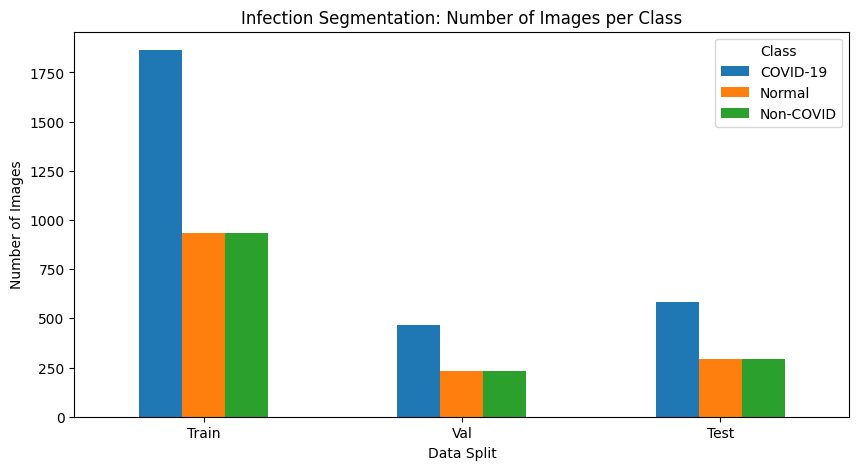

In [ ]:
splits = ['Train', 'Val', 'Test']
infection_counts = {
    'COVID-19': [1864, 466, 583],
    'Normal': [932, 233, 291],
    'Non-COVID': [932, 233, 292]
}

df_infection = pd.DataFrame(infection_counts, index=splits)

# Plot
df_infection.plot(kind='bar', figsize=(10,5))
plt.title('Infection Segmentation: Number of Images per Class')
plt.xlabel('Data Split')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.show()

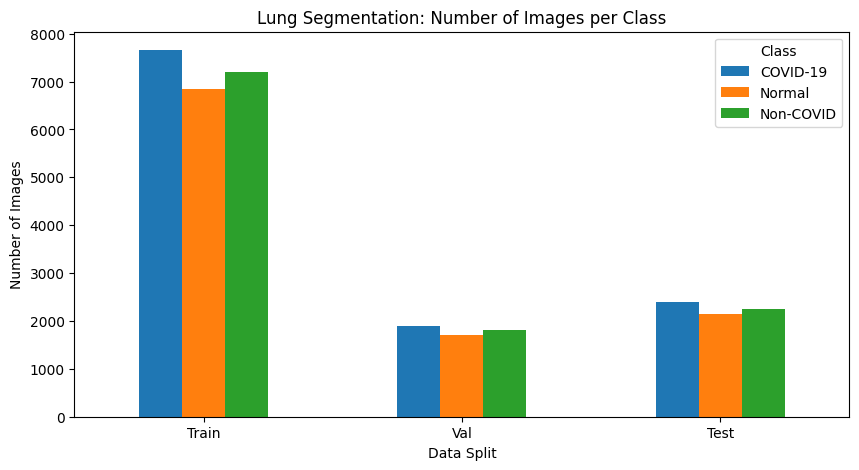

In [ ]:

lung_counts = {
    'COVID-19': [7658, 1903, 2395],
    'Normal': [6849, 1712, 2140],
    'Non-COVID': [7208, 1802, 2253]
}

df_lung = pd.DataFrame(lung_counts, index=splits)

# Plot
df_lung.plot(kind='bar', figsize=(10,5))
plt.title('Lung Segmentation: Number of Images per Class')
plt.xlabel('Data Split')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.show()


-- Infection Segmentation dataset is small (~5.8k images) and slightly imbalanced,
but includes infection masks for explainability.

-- Lung Segmentation dataset is much larger (~33.9k images) and more balanced

-- COVID-19 class has slightly more images in both datasets.

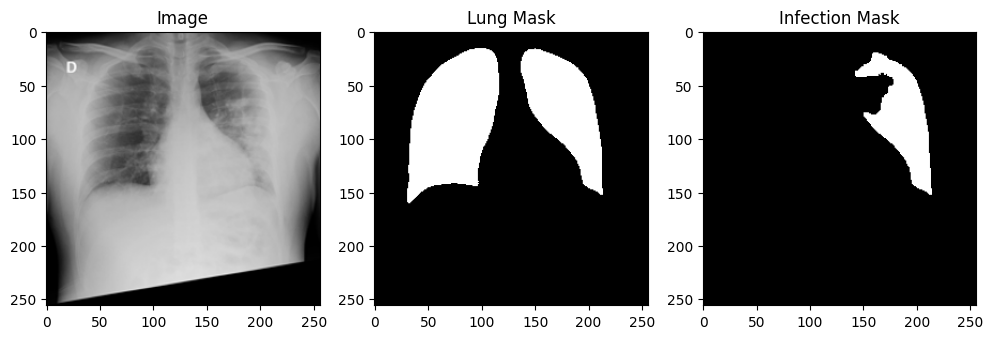

In [ ]:
import cv2
import random

split = "Train"
cls = "COVID-19"

img_dir = os.path.join(path, "Infection Segmentation Data", "Infection Segmentation Data", split, cls, "images")
mask_dir = os.path.join(path, "Infection Segmentation Data", "Infection Segmentation Data", split, cls, "lung masks")
infection_dir = os.path.join(path, "Infection Segmentation Data", "Infection Segmentation Data", split, cls, "infection masks")

sample_file = random.choice(os.listdir(img_dir))

img = cv2.imread(os.path.join(img_dir, sample_file))
lung_mask = cv2.imread(os.path.join(mask_dir, sample_file))
infection_mask = cv2.imread(os.path.join(infection_dir, sample_file))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Image")
plt.subplot(1,3,2); plt.imshow(lung_mask, cmap="gray"); plt.title("Lung Mask")
plt.subplot(1,3,3); plt.imshow(infection_mask, cmap="gray"); plt.title("Infection Mask")
plt.show()

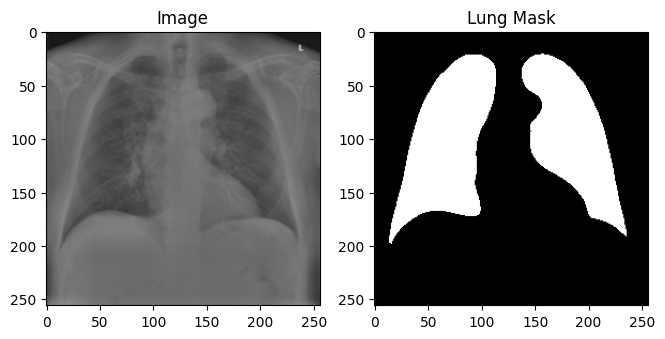

In [ ]:
import cv2
import random

split = "Train"
cls = "COVID-19"

img_dir = os.path.join(path, "Lung Segmentation Data", "Lung Segmentation Data", split, cls, "images")
mask_dir = os.path.join(path, "Lung Segmentation Data", "Lung Segmentation Data", split, cls, "lung masks")

sample_file = random.choice(os.listdir(img_dir))

img = cv2.imread(os.path.join(img_dir, sample_file))
lung_mask = cv2.imread(os.path.join(mask_dir, sample_file))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Image")
plt.subplot(1,3,2); plt.imshow(lung_mask, cmap="gray"); plt.title("Lung Mask")
plt.show()

In [ ]:
shapes = []
for f in os.listdir(img_dir):
    img_path = os.path.join(img_dir, f)
    img = cv2.imread(img_path)
    if img is not None:
        shapes.append(img.shape)
    else:
        print("Could not read:", f)

print("Unique shapes read:", set(shapes))


Unique shapes read: {(256, 256, 3)}


In [ ]:
import torch
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                     [0.229, 0.224, 0.225]),
])

In [ ]:
from PIL import Image
from torch.utils.data import Dataset
class COVIDImageDataset(Dataset):
  def __init__(self, root_dir, transform=None, classes=["COVID-19", "Normal", "Non-COVID"]):
    self.root_dir = root_dir
    self.transform = transform
    self.samples = []
    self.classes = classes
    self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}

    for cls in classes:
      img_dir = os.path.join(root_dir, cls, "images")
      if not os.path.exists(img_dir):
        continue
      for img_name in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img_name)
        label = self.class_to_idx[cls]
        self.samples.append((img_path, label))

  def __len__(self):
        return len(self.samples)

  def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label




In [ ]:
base_path = "/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data"

In [ ]:
train_data = COVIDImageDataset(os.path.join(base_path, "Train"), transform=transform)
val_data = COVIDImageDataset(os.path.join(base_path,"Val"),transform=transform)
test_data = COVIDImageDataset(os.path.join(base_path,"Test"),transform=transform)

In [ ]:
print(os.path.join(base_path, "Train"))

/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Train


In [ ]:
print(len(train_data), len(val_data), len(test_data))


21715 5417 6788


In [ ]:
import torch.utils.data as Data

train_loader = Data.DataLoader(dataset = train_data,batch_size=64,shuffle=True)
val_loader = Data.DataLoader(dataset=val_data,batch_size=64,shuffle=False)
test_loader = Data.DataLoader(dataset = test_data,batch_size=64,shuffle=False)

In [ ]:
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

340
85
107


In [ ]:
import torch.nn as nn

class_counts = [1864,932,932]
total_samples = len(class_counts)
num_classes = len(class_counts)

class_weights = [total_samples / (num_classes*count)for count in class_counts]
class_weights = torch.tensor(class_weights,dtype=torch.float32)

In [ ]:
import torchvision.models as models

model = models.resnet18(pretrained = True)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 212MB/s]


In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model.fc = nn.Linear(model.fc.in_features,3)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
loss_func = nn.CrossEntropyLoss(weight=class_weights.to(device))

In [ ]:
for epochs in range(20):
  model.train()
  for step,(images,labels) in enumerate(train_loader, start=1):
    images,labels = images.to(device),labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = loss_func(outputs,labels)
    loss.backward()
    optimizer.step()

    if step % 10 == 0:
      print(f"Epoch [{epochs+1}/{20}], Step [{step}/{len(train_data)}], Loss: {loss.item():.4f}")

Epoch [1/20], Step [10/21715], Loss: 0.6312
Epoch [1/20], Step [20/21715], Loss: 0.5116
Epoch [1/20], Step [30/21715], Loss: 0.3783
Epoch [1/20], Step [40/21715], Loss: 0.3554
Epoch [1/20], Step [50/21715], Loss: 0.5228
Epoch [1/20], Step [60/21715], Loss: 0.3780
Epoch [1/20], Step [70/21715], Loss: 0.3796
Epoch [1/20], Step [80/21715], Loss: 0.4046
Epoch [1/20], Step [90/21715], Loss: 0.3719
Epoch [1/20], Step [100/21715], Loss: 0.2795
Epoch [1/20], Step [110/21715], Loss: 0.3232
Epoch [1/20], Step [120/21715], Loss: 0.4143
Epoch [1/20], Step [130/21715], Loss: 0.3643
Epoch [1/20], Step [140/21715], Loss: 0.4458
Epoch [1/20], Step [150/21715], Loss: 0.3318
Epoch [1/20], Step [160/21715], Loss: 0.2251
Epoch [1/20], Step [170/21715], Loss: 0.3156
Epoch [1/20], Step [180/21715], Loss: 0.2983
Epoch [1/20], Step [190/21715], Loss: 0.3082
Epoch [1/20], Step [200/21715], Loss: 0.3684
Epoch [1/20], Step [210/21715], Loss: 0.2750
Epoch [1/20], Step [220/21715], Loss: 0.3997
Epoch [1/20], Step 

In [ ]:
model.eval()  # switch to evaluation mode
val_loss = 0
correct = 0
total = 0

with torch.no_grad():  # no gradient needed for validation
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = loss_func(outputs, labels)
        val_loss += loss.item()

        # compute accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_loss /= len(val_loader)
val_acc = correct / total
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")


Validation Loss: 0.3160, Validation Accuracy: 0.9356


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
  for x,y in test_loader:
    x,y = x.to(device),y.to(device)
    outputs = model(x)
    _,predicted = torch.max(outputs.data,1)
    total += y.size(0)
    correct += (predicted == y).sum().item()

print(f"Test Accuracy: {100*correct/total}%")

Test Accuracy: 94.5344725987036%


In [ ]:
torch.save(model.state_dict(), "model_mnist.pth")

In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained = False)
model.fc = nn.Linear(model.fc.in_features,3)
model.load_state_dict(torch.load('/content/lung_segementation.pth', map_location=device))
model.to(device)
model.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
  for images,labels in test_loader:
    images,labels = images.to(device),labels.to(device)
    outputs = model(images)
    probs = torch.softmax(outputs, dim=1)
    _, preds = torch.max(outputs,1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())
    all_probs.extend(probs.cpu().numpy())

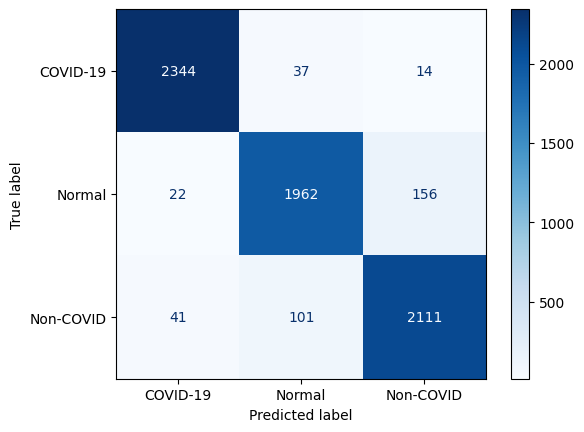

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["COVID-19", "Normal", "Non-COVID"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2395
           1       0.93      0.92      0.93      2140
           2       0.93      0.94      0.93      2253

    accuracy                           0.95      6788
   macro avg       0.94      0.94      0.94      6788
weighted avg       0.95      0.95      0.95      6788



In [ ]:
classes = ["COVID-19", "Normal", "Non-COVID"]
TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (FP + FN + TP)

specificity = TN / (TN + FP)
for i, cls in enumerate(classes):
  print(f"  Specificity        : {specificity[i]:.3f}")

  Specificity        : 0.986
  Specificity        : 0.970
  Specificity        : 0.963


In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.preprocessing import label_binarize

all_labels_bin = label_binarize(all_labels, classes=[0,1,2])
all_probs = np.array(all_probs)

roc_auc = roc_auc_score(all_labels_bin, all_probs, average='macro', multi_class='ovr')
print(f"AUROC: {roc_auc:.4f}")

AUROC: 0.9919


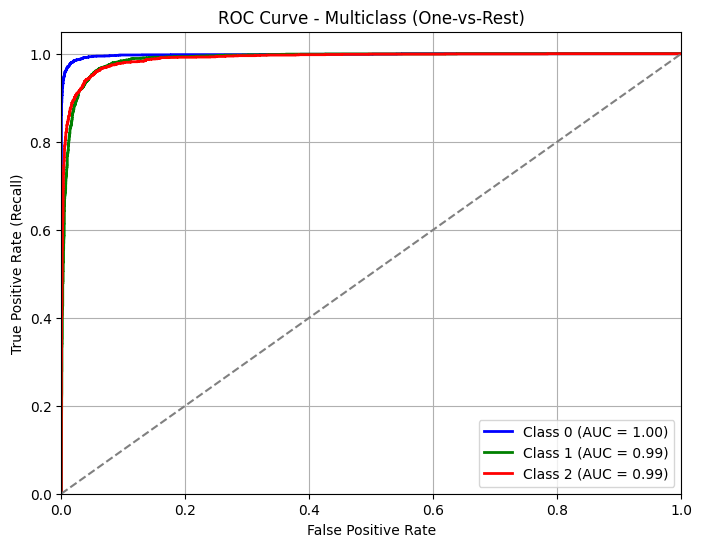

In [ ]:
plt.figure(figsize=(8,6))

colors = ['blue', 'green', 'red']
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(all_labels_bin[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot chance line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Multiclass (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

/tmp/ipython-input-1414302370.py:31: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  heatmap = np.maximum(heatmap, 0)


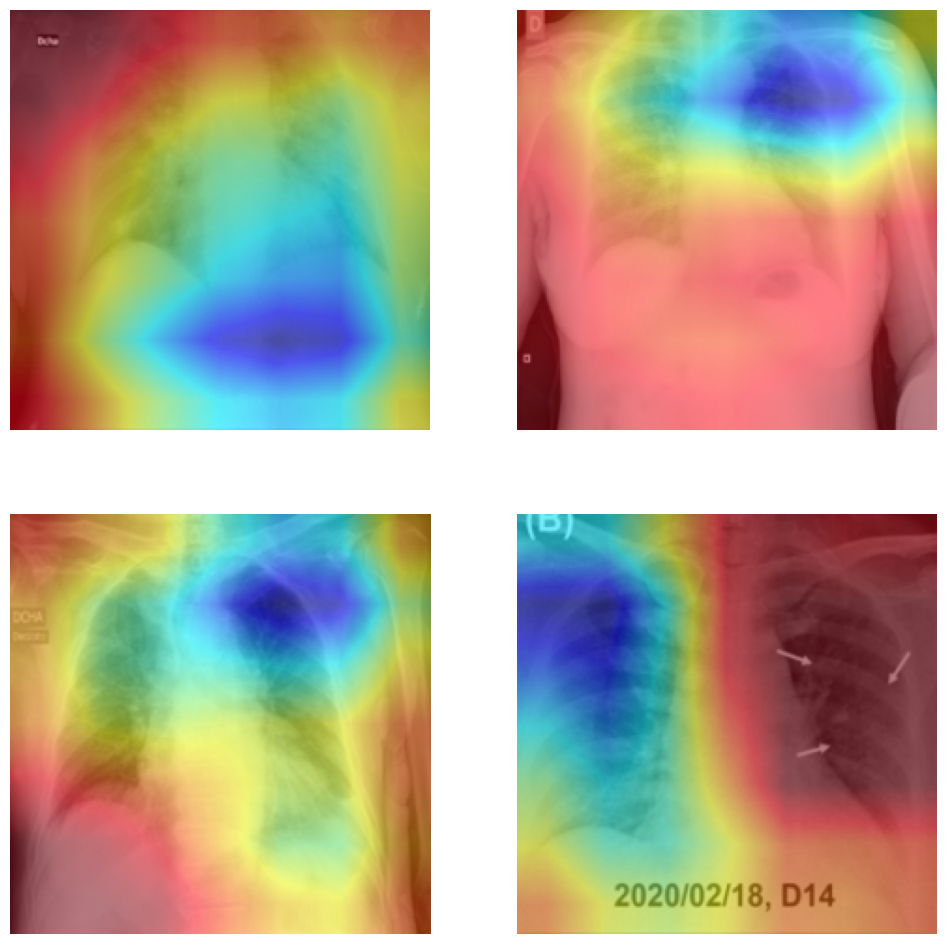

In [ ]:
import cv2
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.model.eval()
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate(self, input_image, class_idx=None):
        input_image = input_image.unsqueeze(0).to(next(self.model.parameters()).device)
        output = self.model(input_image)
        if class_idx is None:
            class_idx = torch.argmax(output, dim=1).item()
        self.model.zero_grad()
        loss = output[0, class_idx]
        loss.backward()
        pooled_gradients = torch.mean(self.gradients, dim=[0,2,3])
        activations = self.activations[0]
        for i in range(activations.shape[0]):
            activations[i,:,:] *= pooled_gradients[i]
        heatmap = torch.sum(activations, dim=0).cpu()
        heatmap = np.maximum(heatmap, 0)
        heatmap /= torch.max(heatmap)
        return heatmap.numpy()

# --- Function to overlay heatmap ---
def show_gradcam(img_tensor, heatmap):
    img = img_tensor.permute(1,2,0).cpu().numpy()
    img = img - img.min()
    img = img / img.max()
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap)/255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    plt.imshow(cam)
    plt.axis('off')

# --- Pick a few test images ---
target_layer = model.layer4[1].conv2
grad_cam = GradCAM(model, target_layer)

num_images = 4
images, labels = next(iter(test_loader))

plt.figure(figsize=(12,12))
for i in range(num_images):
    img = images[i].to(device)
    label = labels[i].item()
    heatmap = grad_cam.generate(img, class_idx=None)
    plt.subplot(2,2,i+1)
    show_gradcam(img, heatmap)
plt.show()

Chosen test images:
 - /content/covid_1579.png
 - /content/covid_1582.png
 - /content/Normal (1).png
 - /content/Normal (10).png
 - /content/non_COVID (11905).png
 - /content/non_COVID (11906).png


/tmp/ipython-input-540430867.py:41: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  heatmap = np.maximum(heatmap, 0)


Saved Grad-CAM -> gradcam_outputs/gradcam_1.png
Saved Grad-CAM -> gradcam_outputs/gradcam_2.png
Saved Grad-CAM -> gradcam_outputs/gradcam_3.png
Saved Grad-CAM -> gradcam_outputs/gradcam_4.png
Saved Grad-CAM -> gradcam_outputs/gradcam_5.png
Saved Grad-CAM -> gradcam_outputs/gradcam_6.png


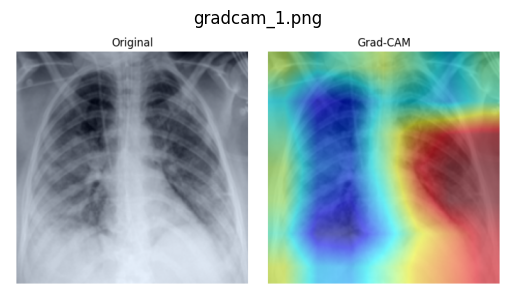

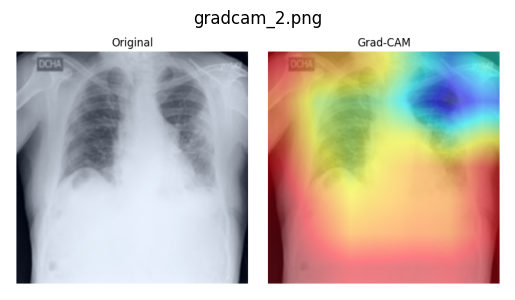

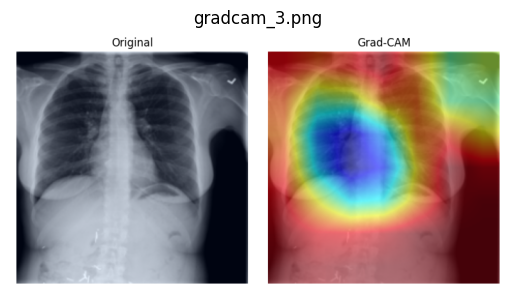

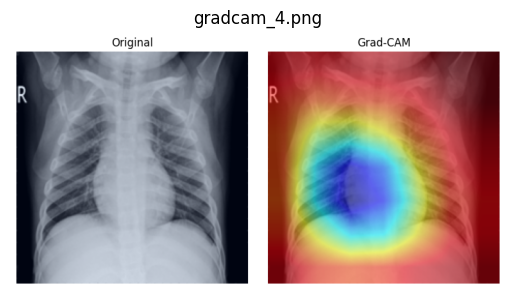

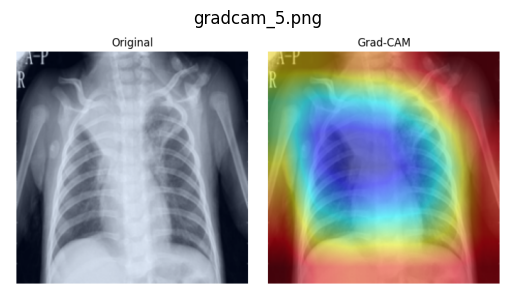

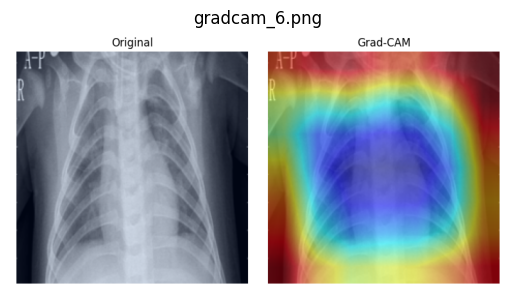

In [ ]:
import os
import shutil
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# -------------------------------
# Grad-CAM class
# -------------------------------
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.model.eval()
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate(self, input_image, class_idx=None):
        input_image = input_image.unsqueeze(0).to(next(self.model.parameters()).device)
        output = self.model(input_image)
        if class_idx is None:
            class_idx = torch.argmax(output, dim=1).item()
        self.model.zero_grad()
        loss = output[0, class_idx]
        loss.backward()
        pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])
        activations = self.activations[0]
        for i in range(activations.shape[0]):
            activations[i, :, :] *= pooled_gradients[i]
        heatmap = torch.sum(activations, dim=0).cpu()
        heatmap = np.maximum(heatmap, 0)
        heatmap /= torch.max(heatmap)
        return heatmap.numpy()

# -------------------------------
# Function: side-by-side plot
# -------------------------------
def show_and_save_gradcam(img_tensor, heatmap, orig_path, save_path):
    # Convert tensor back to image
    img = img_tensor.permute(1,2,0).cpu().numpy()
    img = img - img.min()
    img = img / img.max()

    # Prepare heatmap
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    heatmap_color = np.float32(heatmap_color) / 255
    cam = heatmap_color + np.float32(img)
    cam = cam / np.max(cam)

    # Plot original + GradCAM side by side
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].imshow(img)
    axs[0].set_title("Original")
    axs[0].axis("off")

    axs[1].imshow(cam)
    axs[1].set_title("Grad-CAM")
    axs[1].axis("off")

    plt.tight_layout()
    plt.savefig(save_path, bbox_inches="tight")
    plt.close()

# -------------------------------
# Step 1: Point to your uploaded images
# -------------------------------
chosen_files = [
    "/content/covid_1579.png",
    "/content/covid_1582.png",
    "/content/Normal (1).png",
    "/content/Normal (10).png",
    "/content/non_COVID (11905).png",
    "/content/non_COVID (11906).png"
]

print("Chosen test images:")
for f in chosen_files:
    print(" -", f)

# -------------------------------
# Step 2: Run Grad-CAM
# -------------------------------
target_layer = model.layer4[1].conv2  # adjust depending on model
grad_cam = GradCAM(model, target_layer)

save_dir = "gradcam_outputs"
os.makedirs(save_dir, exist_ok=True)

for idx, f in enumerate(chosen_files):
    img = Image.open(f).convert("RGB")
    img_tensor = transform(img).to(device)

    heatmap = grad_cam.generate(img_tensor, class_idx=None)

    save_path = os.path.join(save_dir, f"gradcam_{idx+1}.png")
    show_and_save_gradcam(img_tensor, heatmap, f, save_path)
    print(f"Saved Grad-CAM -> {save_path}")

# -------------------------------
# Step 3: Display all outputs
# -------------------------------
for f in sorted(os.listdir(save_dir)):
    img = cv2.imread(os.path.join(save_dir, f))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f)
    plt.axis("off")
    plt.show()


Chosen test images:
 - /content/covid_1579.png
 - /content/covid_1582.png
 - /content/Normal (1).png
 - /content/Normal (10).png
 - /content/non_COVID (11905).png
 - /content/non_COVID (11906).png


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)
/tmp/ipython-input-2753086348.py:41: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  heatmap = np.maximum(heatmap, 0)


Saved Grad-CAM -> gradcam_outputs/gradcam_1.png
Saved Grad-CAM -> gradcam_outputs/gradcam_2.png
Saved Grad-CAM -> gradcam_outputs/gradcam_3.png
Saved Grad-CAM -> gradcam_outputs/gradcam_4.png
Saved Grad-CAM -> gradcam_outputs/gradcam_5.png
Saved Grad-CAM -> gradcam_outputs/gradcam_6.png


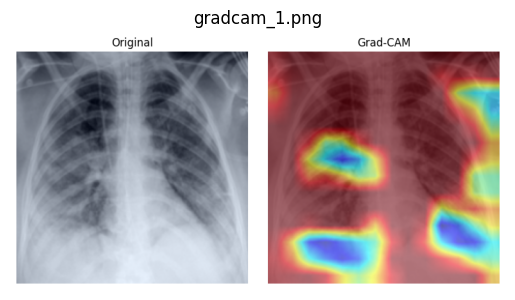

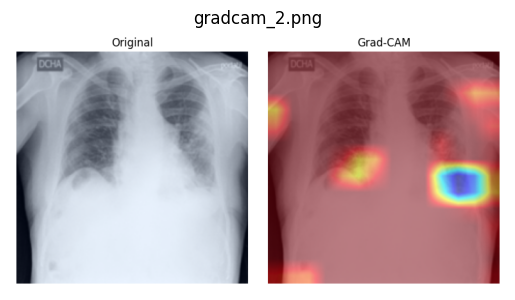

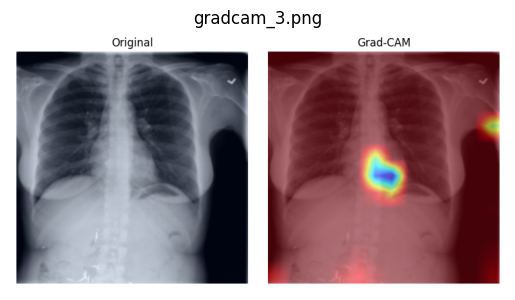

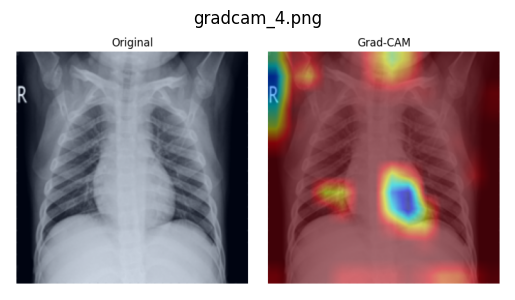

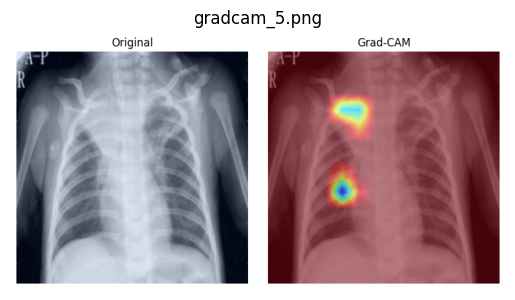

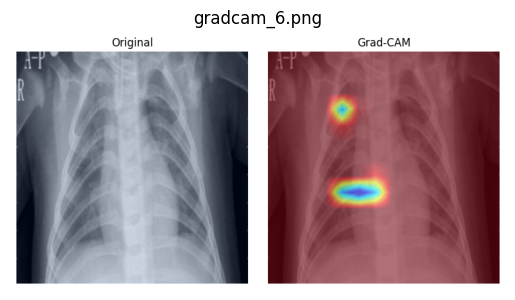

In [ ]:
import os
import shutil
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# -------------------------------
# Grad-CAM class
# -------------------------------
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.model.eval()
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate(self, input_image, class_idx=None):
        input_image = input_image.unsqueeze(0).to(next(self.model.parameters()).device)
        output = self.model(input_image)
        if class_idx is None:
            class_idx = torch.argmax(output, dim=1).item()
        self.model.zero_grad()
        loss = output[0, class_idx]
        loss.backward()
        pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])
        activations = self.activations[0]
        for i in range(activations.shape[0]):
            activations[i, :, :] *= pooled_gradients[i]
        heatmap = torch.sum(activations, dim=0).cpu()
        heatmap = np.maximum(heatmap, 0)
        heatmap /= torch.max(heatmap)
        return heatmap.numpy()

# -------------------------------
# Function: side-by-side plot
# -------------------------------
def show_and_save_gradcam(img_tensor, heatmap, orig_path, save_path):
    # Convert tensor back to image
    img = img_tensor.permute(1,2,0).cpu().numpy()
    img = img - img.min()
    img = img / img.max()

    # Prepare heatmap
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    heatmap_color = np.float32(heatmap_color) / 255
    cam = heatmap_color + np.float32(img)
    cam = cam / np.max(cam)

    # Plot original + GradCAM side by side
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].imshow(img)
    axs[0].set_title("Original")
    axs[0].axis("off")

    axs[1].imshow(cam)
    axs[1].set_title("Grad-CAM")
    axs[1].axis("off")

    plt.tight_layout()
    plt.savefig(save_path, bbox_inches="tight")
    plt.close()

# -------------------------------
# Step 1: Point to your uploaded images
# -------------------------------
chosen_files = [
    "/content/covid_1579.png",
    "/content/covid_1582.png",
    "/content/Normal (1).png",
    "/content/Normal (10).png",
    "/content/non_COVID (11905).png",
    "/content/non_COVID (11906).png"
]

print("Chosen test images:")
for f in chosen_files:
    print(" -", f)

# -------------------------------
# Step 2: Run Grad-CAM
# -------------------------------
target_layer = model.layer3[1].conv2  # adjust depending on model
grad_cam = GradCAM(model, target_layer)

save_dir = "gradcam_outputs"
os.makedirs(save_dir, exist_ok=True)

for idx, f in enumerate(chosen_files):
    img = Image.open(f).convert("RGB")
    img_tensor = transform(img).to(device)

    heatmap = grad_cam.generate(img_tensor, class_idx=None)

    save_path = os.path.join(save_dir, f"gradcam_{idx+1}.png")
    show_and_save_gradcam(img_tensor, heatmap, f, save_path)
    print(f"Saved Grad-CAM -> {save_path}")

# -------------------------------
# Step 3: Display all outputs
# -------------------------------
for f in sorted(os.listdir(save_dir)):
    img = cv2.imread(os.path.join(save_dir, f))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f)
    plt.axis("off")
    plt.show()


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# --- GradCAM class (same as before) ---
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.model.eval()
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate(self, input_image, class_idx=None):
        input_image = input_image.unsqueeze(0).to(next(self.model.parameters()).device)
        output = self.model(input_image)
        if class_idx is None:
            class_idx = torch.argmax(output, dim=1).item()
        self.model.zero_grad()
        loss = output[0, class_idx]
        loss.backward()
        pooled_gradients = torch.mean(self.gradients, dim=[0,2,3])
        activations = self.activations[0]
        for i in range(activations.shape[0]):
            activations[i,:,:] *= pooled_gradients[i]
        heatmap = torch.sum(activations, dim=0).cpu()
        heatmap = np.maximum(heatmap, 0)
        heatmap /= torch.max(heatmap)
        return heatmap.numpy()

# --- Overlay heatmap ---
def show_and_save_gradcam(img_tensor, heatmap, save_path):
    img = img_tensor.permute(1,2,0).cpu().numpy()
    img = img - img.min()
    img = img / img.max()

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap)/255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)

    plt.imshow(cam)
    plt.axis('off')
    plt.savefig(save_path, bbox_inches="tight")
    plt.close()

# --- Pick fixed test image paths (share these with teammates) ---
chosen_files = [
    test_data.samples[0][0],    # first test image
    test_data.samples[50][0],   # 50th test image
    test_data.samples[100][0],  # 100th test image
    test_data.samples[200][0],  # 200th test image
]

print("Chosen test images:")
for f in chosen_files:
    print(" -", f)

# --- Run Grad-CAM on these files ---
target_layer = model.layer2[1].conv2
grad_cam = GradCAM(model, target_layer)

save_dir = "gradcam_outputs"
os.makedirs(save_dir, exist_ok=True)

for idx, f in enumerate(chosen_files):
    img = Image.open(f).convert("RGB")
    img_tensor = transform(img).to(device)
    heatmap = grad_cam.generate(img_tensor, class_idx=None)

    save_path = os.path.join(save_dir, f"gradcam_layer[2]_{idx+1}.png")
    show_and_save_gradcam(img_tensor, heatmap, save_path)
    print(f"Saved Grad-CAM -> {save_path}")


Chosen test images:
 - /root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Lung Segmentation Data/Lung Segmentation Data/Test/COVID-19/images/sub-S09382_ses-E23413_run-1_bp-chest_vp-ap_cr.png
 - /root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Lung Segmentation Data/Lung Segmentation Data/Test/COVID-19/images/sub-S09502_ses-E19818_run-1_bp-chest_vp-ap_dx.png
 - /root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Lung Segmentation Data/Lung Segmentation Data/Test/COVID-19/images/sub-S12378_ses-E24771_run-1_bp-chest_vp-pa_cr.png
 - /root/.cache/kagglehub/datasets/anasmohammedtahir/covidqu/versions/7/Lung Segmentation Data/Lung Segmentation Data/Test/COVID-19/images/sub-S09318_ses-E23744_run-1_bp-chest_vp-ap_cr.png


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)
/tmp/ipython-input-2972137453.py:36: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  heatmap = np.maximum(heatmap, 0)


Saved Grad-CAM -> gradcam_outputs/gradcam_layer[2]_1.png
Saved Grad-CAM -> gradcam_outputs/gradcam_layer[2]_2.png
Saved Grad-CAM -> gradcam_outputs/gradcam_layer[2]_3.png
Saved Grad-CAM -> gradcam_outputs/gradcam_layer[2]_4.png
